In [8]:
#import statments
import csv
import pandas as pd
import matplotlib.pyplot as plt

### i) Read the data from th file 'people.txt'

In [2]:
data = pd.read_csv("people.txt.csv")
data

,Age,Age_group,Height,Status,Years_married
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widow,2
4,34,child,-7.0,married,3


### ii) Create a ruleset E that contains rules to check:

1. 0<age<150
<br>
2. age > years_married
<br>
3. status $\epsilon$ {"single", "married", "widow"}
<br>
4. age<18       agegroup="child" <br>
   18<=age<65   agegroup="adult" <br>
   65<=age      agegroup="elderly"

In [3]:
def rule4(row):
    age = row[1]
    agegroup = row[2]
    
    if age<18 and agegroup=="child":
        return True
    if age>=18 and age<65 and agegroup=="adult":
        return True
    if age>65 and agegroup=="elderly":
        return True
    return False
    
rules = [ lambda x: True if int(x[1])>0 and int(x[1])<150 else False, # 0<Age<150
          lambda x: True if x[1]>x[5] else False,                      # Age > Years_married
          lambda x: True if x[4] in ["single", "married", "widow"] else False,
          rule4
        ]

### iii) Check wether ruleset E is voilated by the data in the file.

In [4]:
rules_voilation_count = [0 for i in range(5)]

for index, rule in enumerate(rules):
    for row in data.itertuples():
        result = rule(row)
        if not result:
            rules_voilation_count[index] += 1
            
        print("Rule{} on Row{} ".format(index,row[0]),result)
    print("=======================")

Rule0 on Row0  True
Rule0 on Row1  True
Rule0 on Row2  True
Rule0 on Row3  False
Rule0 on Row4  True
Rule1 on Row0  True
Rule1 on Row1  True
Rule1 on Row2  False
Rule1 on Row3  True
Rule1 on Row4  True
Rule2 on Row0  True
Rule2 on Row1  True
Rule2 on Row2  True
Rule2 on Row3  True
Rule2 on Row4  True
Rule3 on Row0  True
Rule3 on Row1  True
Rule3 on Row2  True
Rule3 on Row3  True
Rule3 on Row4  False


### iV) Summarize the results obtained in part (iii)

### v) Visvualize the results obtained in part (iii) 

[1, 1, 0, 1, 0]


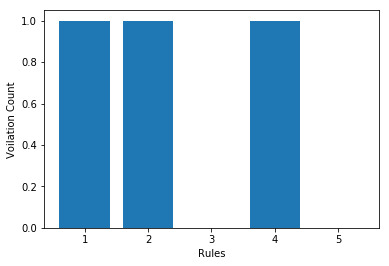

In [13]:
print(rules_voilation_count)

x = list(range(1,6))
y = rules_voilation_count


plt.bar(x,y)

plt.xlabel("Rules")
plt.ylabel("Voilation Count");